# Лабораторная работа номер 2. Исследование методов решения систем линейных алгебраических уравнений.

In [4]:
import numpy as np

Рассматриваем систему вида 
        
        Ax=F

In [51]:
A = np.zeros((100, 100))

A[0,:] = 1
for i in range(2, 100):
    A[i -1, i - 2]  = 1
    A[i - 1, i - 1] = 10
    A[i - 1, i] = 1

A[99,98] = 1
A[99,99] = 1

F = np.arange(100, 0, -1)

print(A)
print(F)

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1. 10.  1. ...  0.  0.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  1.  0.]
 [ 0.  0.  0. ...  1. 10.  1.]
 [ 0.  0.  0. ...  0.  1.  1.]]
[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]


In [18]:
def swap_rows (matrix, i, j, n):
 
    for k in range(n + 1):
 
        tmp = matrix[i][k]
        matrix[i][k] = matrix[j][k]
        matrix[j][k] = tmp

## Метод Гаусса

In [19]:
gaus = np.concatenate ([A, F[:, None]], axis=1)
n = 100 # razmernost'

def gaus_elim (matrix):
    
    for k in range(n):   
        i_max = k
        v_max = matrix [i_max][k]
 
        for i in range(k + 1, n):
            if (abs (matrix[i][k]) > abs (v_max)):
                v_max = matrix[i][k]
                i_max = i
 
        if (i_max != k):
            swap_rows (matrix, k, i_max, n)
 
        for i in range(k + 1, n):
 
            f = matrix[i][k] / matrix[k][k]
            for j in range (k + 1, n + 1):
                matrix[i][j] -= matrix[k][j] * f
 
            matrix[i][k] = 0
    return backSub(matrix)
 
def backSub (matrix):
    x = [None for _ in range(n)] 
    for i in range(n - 1, -1, -1):

        x[i] = matrix[i][n]
 
        for j in range(i + 1, n):
            x[i] -= matrix[i][j] * x[j]
 
        x[i] = (x[i] / matrix[i][i])

    return x


print (gaus)
ans = gaus_elim(gaus)

# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
# 2-norm (largest sing. value)
print("\nНевязка:", np.linalg.norm (F - A.dot(ans), ord = 2))

[[  1.   1.   1. ...   1.   1. 100.]
 [  1.  10.   1. ...   0.   0.  99.]
 [  0.   1.  10. ...   0.   0.  98.]
 ...
 [  0.   0.   0. ...   1.   0.   3.]
 [  0.   0.   0. ...  10.   1.   2.]
 [  0.   0.   0. ...   1.   1.   1.]]

Невязка: 3.1344173814659136e-13


## LU разложение

In [21]:
def LUdecomposition (matrix):
    L = np.eye (n, dtype = 'float64')
    U = np.full ((n, n), 0, dtype = 'float64')

    # Разложим на верхнюю треугольную и нижнюю треугольные матрицы
    for i in range(n):
        for j in range (n):
            if i <= j:
                U[i, j] = matrix[i, j]
                for k in range(i):
                    U[i, j] -= L[i, k] * U[k, j]
            else:
                L[i, j] = 1 / U[j, j] * matrix[i, j]
                for k in range(j):
                    L[i, j] -= 1 / U[j, j] * L[i, k] * U[k, j]

    print ("L: ", L)
    print ("U: ", U)

    y = np.zeros(n)
    for i in range(n):
        y[i] = F[i]
        for j in range(i):
            y[i] -= L[i, j] * y[j]
        y[i] /=  L[i, i]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(n - 1, i, -1):
            x[i] -= U[i, j] * x[j]
        x[i] /= U[i, i]

    return x

x = LUdecomposition (A)
print ("Невязка", np.linalg.norm (F - A.dot(x), ord = 2))

L:  [[1.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.11111111 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.10102051 1.         0.        ]
 [0.         0.         0.         ... 0.         0.10102051 1.        ]]
U:  [[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  9.00000000e+00  0.00000000e+00 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+01 ...  1.11111111e-01
   1.11111111e-01  1.11111111e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.89897949e+00
   1.00000000e+00 -2.88841690e-96]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   9.89897949e+00  1.00000000e+00]
 [ 0.00000000e+00 

Видно, что невязка чуть больше чем в методе Гаусса

## Метод верхней релаксации

In [53]:
# разложение в сумму 3 матриц
D = np.diag (np.diag(A))
L = np.tril (A) - D
U = np.triu (A) - D

omega = 1
eps = 1e-12

B   = (- np.linalg.inv(D + omega * L)).dot((omega - 1) * D + omega * U)
F_b = omega * (np.linalg.inv(D + omega * L)).dot(F)

def SOR (matrix):

    # 1) Выбрать начальное приближение eps и параметр релаксации ω
    # 2) Выполнить итерации по формуле
    # 3) Проверить условие сходимости. Если не выполнено, повторить шаг 2
    iter = 0
    x = np.zeros(n)
    
    while (np.linalg.norm(F - matrix.dot(x), ord = 2) > eps):
        x = B.dot(x) + F_b
        iter += 1

    return x, iter

ans, iter = SOR (A)
print("Всего итераций совершено:\t", iter)
print("Невязка: \t", np.linalg.norm (F - A.dot(x), ord = 2))

Всего итераций совершено:	 16
Невязка: 	 1.0844327523909555e-13


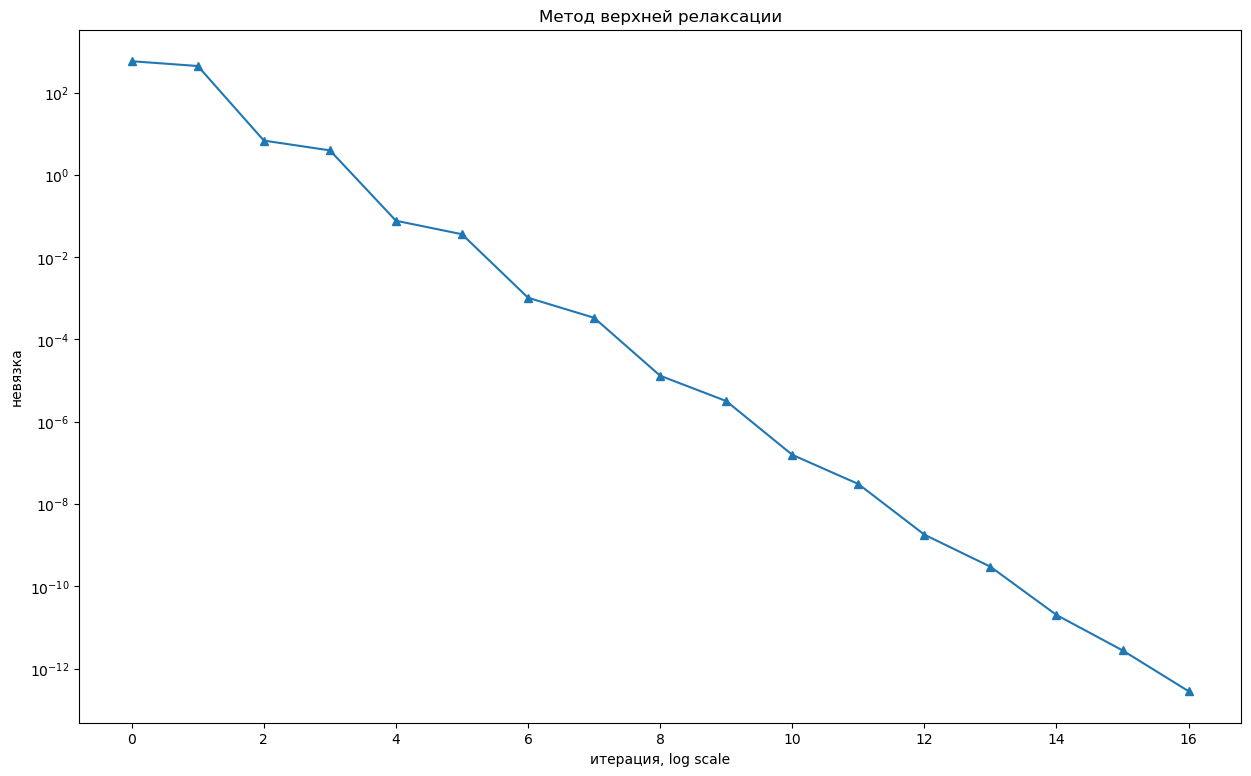

In [57]:
# построим график убывания невязки от числа итераций
import matplotlib.pyplot as plt

x = np.zeros(n)
x_data = []
y_data = []

# разобьем функцию SOR, чтобы построить график
for i in range (iter + 1):
    x_data.append (i)
    y_data.append (np.linalg.norm (F - A.dot (x), ord = 2))
    x = B.dot(x) + F_b

plt.figure (figsize = (15, 9))
ax = plt.gca ()
plt.yscale ("log")
ax.set_title ("Метод верхней релаксации")
ax.set_xlabel (r"итерация")
ax.set_ylabel (r"невязка, log scale")

plt.grid()
plt.plot (x_data, y_data, marker = "^")
plt.show ()

## Метод Якоби

In [63]:
# Чтобы не возникало проблем с построением графика
# не будем создавать отдельную функцию

# начальные условия и разложение исходной матрицы
eps = 1e-12
D = np.diag(A)
R = A - np.diagflat(D)

x = np.zeros(n)
iter = 0

while np.linalg.norm(F - A.dot(x), ord = 2) > eps:
    x = (F - np.dot(R, x)) / D
    iter += 1


print("Всего итераций совершено:\t", iter)
print("Невязка: \t", np.linalg.norm (F - A.dot(x), ord = 2))

Всего итераций совершено:	 38
Невязка: 	 6.440414866157366e-13


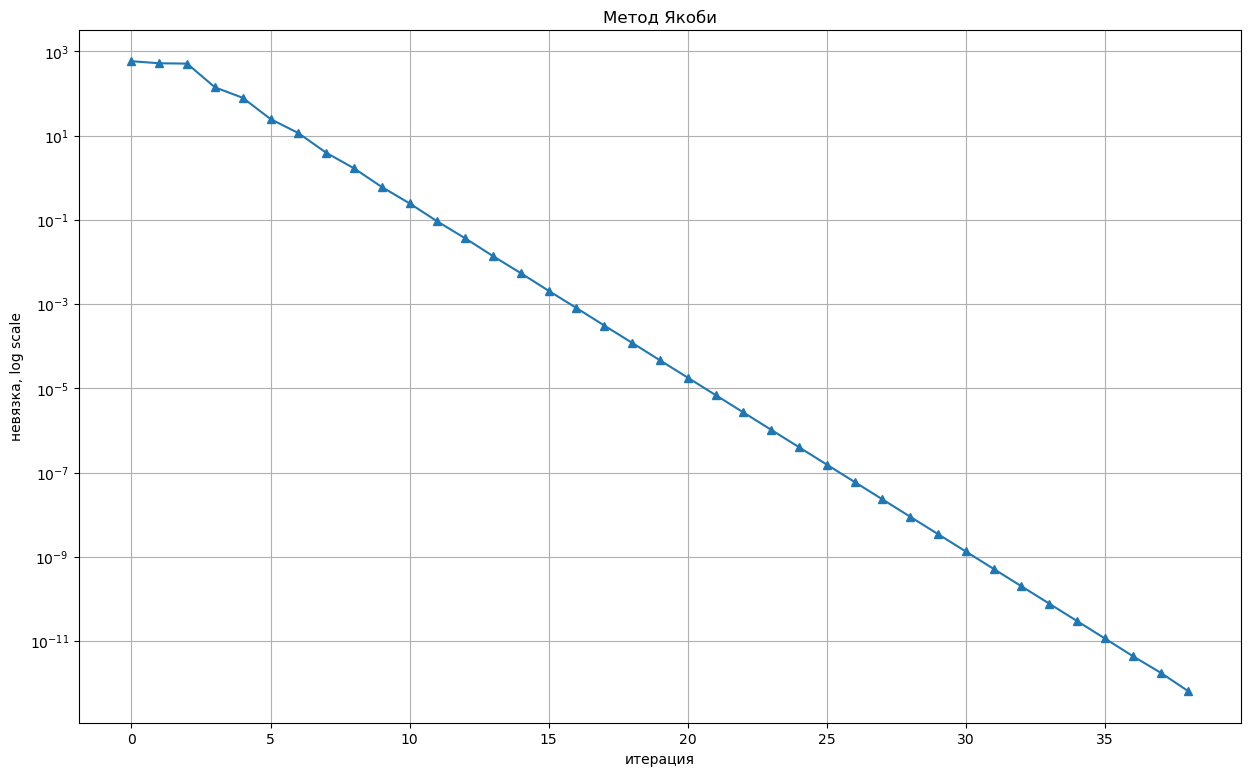

In [66]:
# построим график убывания невязки от числа итераций
import matplotlib.pyplot as plt

x = np.zeros (n)
x_data = []
y_data = []

for i in range (iter + 1):
    x_data.append (i)
    y_data.append (np.linalg.norm (F - A.dot (x), ord = 2))
    x = (F - np.dot(R, x)) / D

plt.figure (figsize = (15, 9))
ax = plt.gca ()
plt.yscale ("log")
ax.set_title ("Метод Якоби")
ax.set_xlabel (r"итерация")
ax.set_ylabel (r"невязка, log scale")

plt.grid()
plt.plot (x_data, y_data, marker = "^")
plt.show ()

## Метод Зейделя

In [77]:
# Чтобы не возникало проблем с построением графика
# не будем создавать отдельную функцию

# начальные условия и разложение исходной матрицы
eps = 1e-12
iter = 0
x = np.zeros(n)

while np.linalg.norm(F - A.dot(x), ord = 2) > eps:

    for i in range (n):
        sum_lower = 0
        sum_higher = 0
        for j in range (i):
            sum_lower +=  (A[i][j] * x[j])
        for j in range (i + 1, n):
            sum_higher += (A[i][j] * x[j])
        
        x[i] = (F[i] - sum_lower - sum_higher) / A[i][i]
    
    iter += 1

print ("Всего итераций совершено\t:", iter)
print ("Невязка: ", np.linalg.norm(F - A.dot(x), ord = 2))

Всего итераций совершено	: 16
Невязка:  2.75312388419511e-13


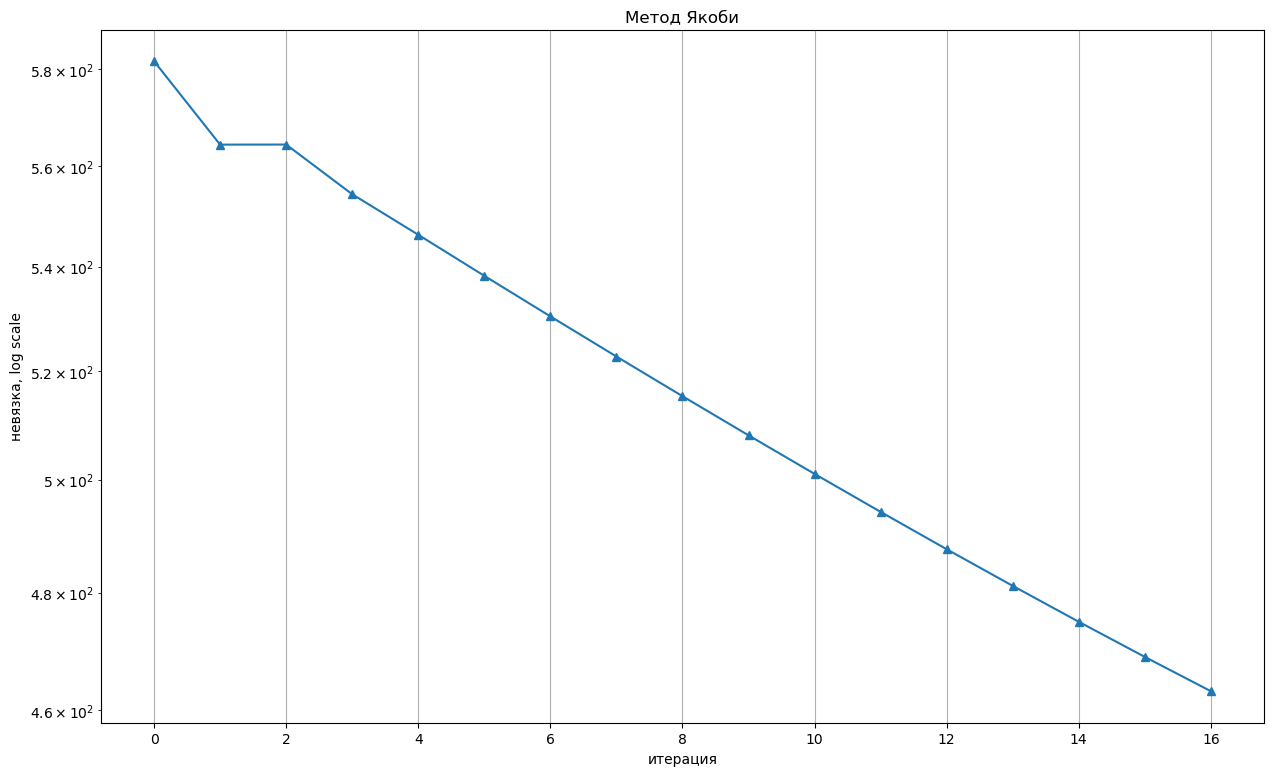

In [78]:
# построим график убывания невязки от числа итераций
import matplotlib.pyplot as plt

x = np.zeros (n)
x_data = []
y_data = []

for i in range (iter + 1):
    x_data.append (i)
    y_data.append (np.linalg.norm (F - A.dot (x), ord = 2))
    sum_lower = 0
    sum_higher = 0
    for j in range (i):
        sum_lower +=  (A[i][j] * x[j])
    for j in range (i + 1, n):
        sum_higher += (A[i][j] * x[j])
    
    x[i] = (F[i] - sum_lower - sum_higher) / A[i][i]

plt.figure (figsize = (15, 9))
ax = plt.gca ()
plt.yscale ("log")
ax.set_title ("Метод Зейделя")
ax.set_xlabel (r"итерация")
ax.set_ylabel (r"невязка, log scale")

plt.grid()
plt.plot (x_data, y_data, marker = "^")
plt.show ()